# Directed Acyclic Graph Scratch Pad

Directed Acyclic Graph generator with adjacency matrix and feature matrix.<br>
@author: Tyler

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm    # For node colour map 

In [2]:
# A - adjacency matrix (node and edges)
# an entire row of 1s indicates arrows away FROM the node, 
# an entire column of 1s indicates arrows TO the node
A = np.array([[0,1,0,0,0,0],
              [0,0,1,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1],
              [0,0,0,0,0,0]])

# F - feature list (node type)
# row indicates node 
# col indicates node type
F = np.array([[0,1,0],
              [0,0,1],
              [1,0,0],
              [1,0,0],
              [1,0,0],
              [1,0,0]])

In [3]:
def render_graph(A, F):
    """
    Renders a graph using NetworkX.
    
    Arguments
    ---------
    A : Adjacency matrix
    F : Feature matrix
    
    Returns
    -------
    G : NetworkX graph
    
    """
    
    # Generate directed NetworkX graph using adjacency matrix 
    G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
    pos = nx.circular_layout(G)
    
    def colour_nodes(G, F):
        """
        Colours graph nodes based on their assigned label in
        the feature matrix.
        
        This is achieved by doing an argmax lookup on the feature matrix.
        Note: cols in the F matrix are node types, rows are the node ids. 
        
        Arguments
        ---------
        G : NetworkX graph instance
        F : Feature matrix
        
        Returns
        -------
        colour_map : Colour map for nodes and their colour
        """
        
        viridis = cm.get_cmap('viridis', F.shape[1])    # unique colour for each col in F
        colour_map = []
        
        for node in G.nodes():
            # Slice F to get node 'type/label':
            node_type = np.argwhere(F[node, :] == 1)[0][0]
            
            if node_type == 0:
                colour_map.append(viridis.colors[0])
            elif node_type == 1:
                colour_map.append(viridis.colors[1])
            elif node_type == 2:
                colour_map.append(viridis.colors[2])
            else:
                pass
        return colour_map
    
    # Generate node colours
    colour_map = colour_nodes(G, F)
        
    # Draw network
    nx.draw_circular(G, node_color=colour_map, node_size=750, cmap=plt.cm.viridis)
    labels = {i: i + 1 for i in G.nodes()}
    nx.draw_networkx_labels(G, pos, font_size=15)
    plt.show()

    return G

c:\users\tyler\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
c:\users\tyler\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


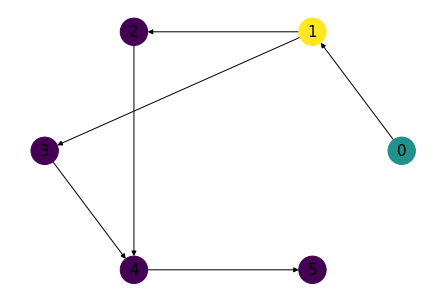

In [4]:
render_graph(A, F)

## Functionality for Generating Adjacency and Feature Matrices

In [5]:
def add_node(A, F, node_type):
    """
    Adds a node, n, to a graph (A, F). 
    Assumes that node is fully connected to other nodes in the graph.
    
    Arguments
    ---------
    A : Adjacency matrix
    F : Feature matrix
    node_type : type of node to add to graph
        index from 1 to n_t
    
    Returns
    -------
    A : Adjacency matrix
    F : Feature matrix
    
    """
    print(f'Shape before adding node: {A.shape}')
    
    # Add n to A
    # col
    A = np.append(A, np.ones(shape=(A.shape[1],1)), 1)
    print(A.shape)
    # row
    A = np.append(A, np.zeros(shape=(1, A.shape[1])), 0)

    
    print(f'Shape after adding node: {A.shape}')
    
    # Updating F
    # node types are fixed and indexed from 1
    f_row_node_label = np.zeros((F.shape[1]))
    f_row_node_label[node_type+1] = 1
    print(f_row_node_label)
    F = np.append(F, [f_row_node_label], 0)
    
    return A, F

In [ ]:
def pad_graph(A, F):
    """
    Pads the graph 
    """
    pass

In [6]:
C, G = add_node(A, F, 1)

Shape before adding node: (6, 6)
(6, 7)
Shape after adding node: (7, 7)
[0. 0. 1.]


In [7]:
C

array([[0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0.]])

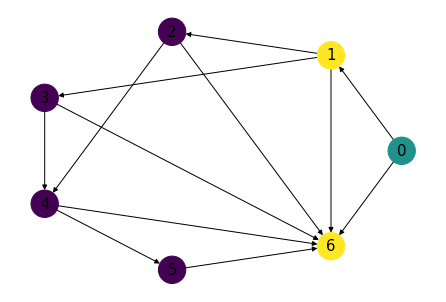

In [8]:
render_graph(C, G)

In [9]:
E, H = add_node(C, G, 1)

Shape before adding node: (7, 7)
(7, 8)
Shape after adding node: (8, 8)
[0. 0. 1.]


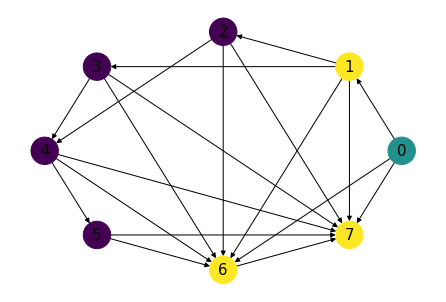

In [10]:
render_graph(E, H)

## Construct basic series block diagram